In [1]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b0f47957807ce9763cec747e2b870006c0b1d845b2bac969908a56e61be66c7e
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [2]:
!pip install ucimlrepo


In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings( 'ignore' )

import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.activations import relu,softmax , sigmoid , tanh
from keras.layers import Dense , Input , Flatten , RandomBrightness , Dropout , ReLU,Normalization , BatchNormalization
from keras.datasets import mnist
from keras.optimizers import Adam , SGD , RMSprop
from keras.optimizers.schedules import ExponentialDecay , PolynomialDecay , PiecewiseConstantDecay , CosineDecay, CosineDecayRestarts,InverseTimeDecay
from keras.models import Sequential , Model
from keras.callbacks import LearningRateScheduler , ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from keras.utils import to_categorical
from keras.regularizers import l2 , l1
from keras.initializers import Zeros , GlorotNormal , GlorotUniform, HeNormal,HeUniform
from keras.losses import categorical_crossentropy , sparse_categorical_crossentropy , binary_crossentropy, mean_squared_error

from sklearn.datasets import load_wine, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

from mlxtend.plotting import plot_decision_regions

from ydata_profiling import ProfileReport

from ucimlrepo import fetch_ucirepo

In [4]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


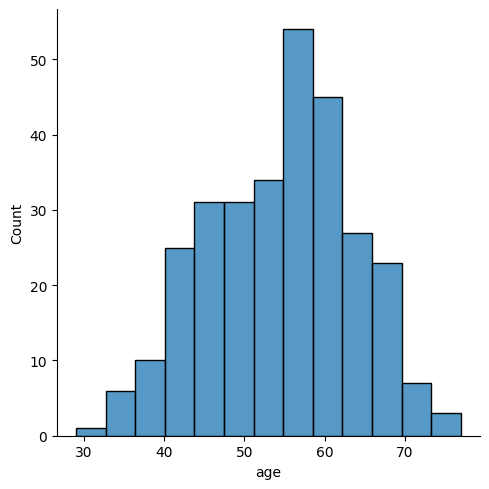

In [6]:
# Univariate Analysis
#  1) Numerical
sbn.displot(data=df['age'],)

<Axes: xlabel='age', ylabel='Density'>

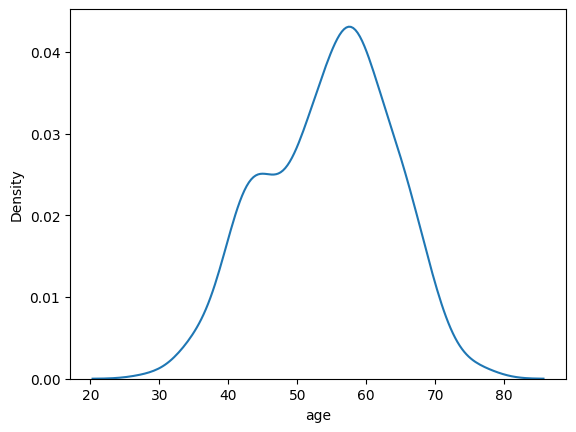

In [7]:
sbn.kdeplot(data=df['age'])

In [8]:
df['age'].skew()

np.float64(-0.21977452171636241)

<Axes: xlabel='sex', ylabel='count'>

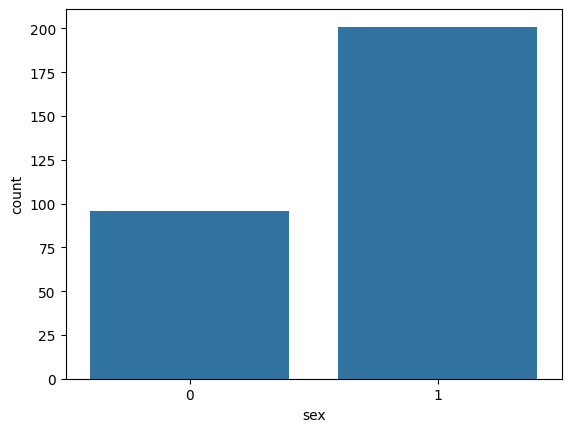

In [9]:
sbn.barplot(data=df['sex'].value_counts())

<Axes: xlabel='sex', ylabel='count'>

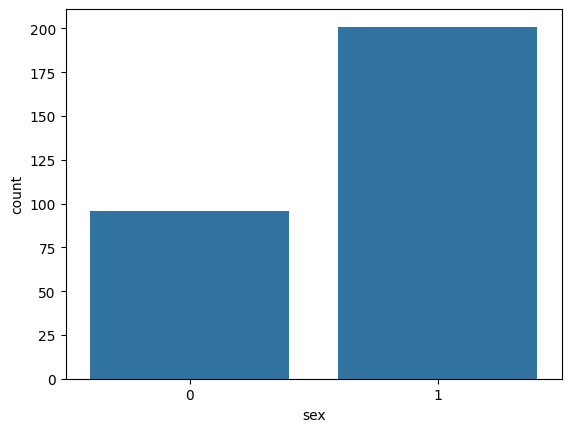

In [10]:
sbn.countplot(x=df['sex'],data=df)

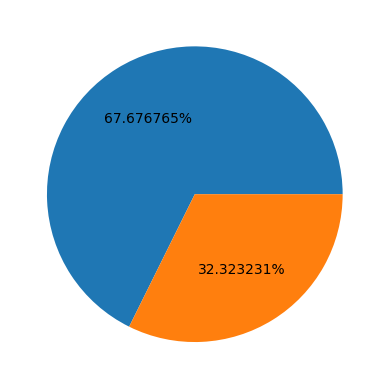

In [11]:
plt.pie(x=df['sex'].value_counts(), autopct= '%2f%%')
plt.show()

In [13]:
# @title
profil = ProfileReport(df,title = "Heart Dataset" ,minimal=False , correlations={
            "auto": {"calculate": True},
            "pearson": {"calculate": True},
            "spearman": {"calculate": True},
            "kendall": {"calculate": True},
            "phi_k": {"calculate": True},
            "cramers": {"calculate": True},
        } )
profil.to_file('heart_profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 40.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]